In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
handWritten = pd.read_csv("DataB.csv", sep=',')
handWritten.drop(columns=[handWritten.columns[0]],axis=1,inplace=True)
V = ['fea.'+str(i+1) for i in range(784)]
R = 'gnd'
VR = V +[R]
SS = StandardScaler()
handWritten[V] = SS.fit_transform(handWritten[V])

In [3]:
import time

0.956899881362915


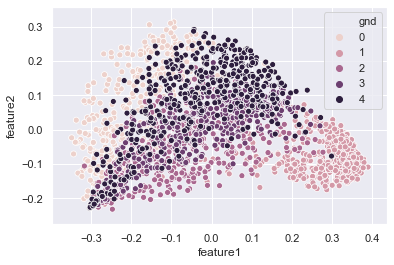

In [4]:
from sklearn.decomposition import KernelPCA
start = time.time()
transformer = KernelPCA(n_components=2, kernel='rbf')
kernelPCAData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
kernelPCAData.columns = ['feature1','feature2']
kernelPCAData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=kernelPCAData ,legend = 'full')
end = time.time()
print(str(end - start))

14.923115015029907


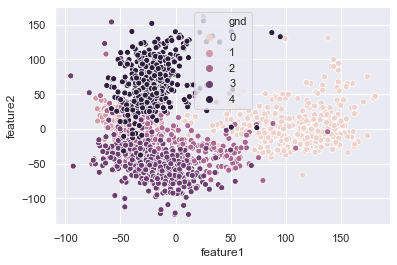

In [5]:
from sklearn.manifold import Isomap
start = time.time()
transformer = Isomap(n_components=2)
IsomapData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
IsomapData.columns = ['feature1','feature2']
IsomapData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=IsomapData,legend = 'full')
end = time.time()
print(str(end - start))

10.226557970046997


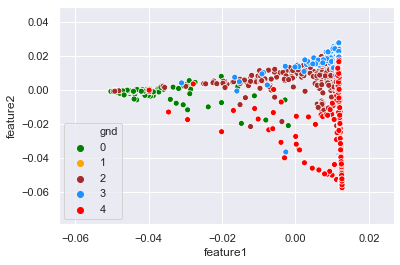

In [6]:
from sklearn.manifold import LocallyLinearEmbedding
start = time.time()
transformer = LocallyLinearEmbedding(n_components=2, random_state = 42)
LLEData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
LLEData.columns = ['feature1','feature2']
LLEData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=LLEData,legend = 'full',palette=['green','orange','brown','dodgerblue','red'])
end = time.time()
print(str(end - start))

I added some plots to see if LLE can separate the points in higher dimensions.

11.882560968399048


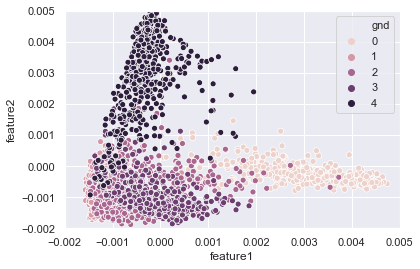

In [7]:
from sklearn.manifold import SpectralEmbedding
start = time.time()
transformer = SpectralEmbedding(n_components=2)
SEData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
SEData.columns = ['feature1','feature2']
SEData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=SEData,legend = 'full')
g.set(xlim=(-0.002,0.005))
g.set(ylim=(-0.002,0.005))
end = time.time()
print(str(end - start))

60.011224031448364


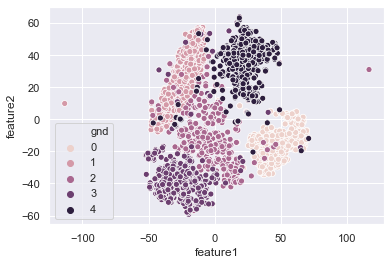

In [8]:
from sklearn.manifold import TSNE
start = time.time()
transformer = TSNE(n_components=2, random_state = 42)
TSNEData = pd.DataFrame(transformer.fit_transform(handWritten[V]))
TSNEData.columns = ['feature1','feature2']
TSNEData['gnd'] = handWritten['gnd']
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="gnd", data=TSNEData,legend = 'full')
end = time.time()
print(str(end - start))